In [1]:
import importlib
import prepare_vocab
import train
import eval
import config
from data.loader import DataLoader
from utils import constant
importlib.reload(config)

<module 'config' from 'C:\\prabhu\\edu\\code\\w266\\final_project\\config.py'>

## loading vocabulary

In [2]:

vocab_params = config.VocabParameters()
training_params = config.TrainingParameters()
eval_params = config.EvalParameters()
opt = vars(vocab_params)
opt['num_class'] = len(constant.LABEL_TO_ID)
opt.update(vars(training_params))


In [3]:
# %Load glove vectors, get IDs for each token, lookup for each id in embedings and create embeding file for out dataset.
vocab = prepare_vocab.prepare_voabulary (vocab_params)

loading files...
2525296 tokens from 68124 examples loaded from ./dataset/tacred/train.json.
802558 tokens from 22631 examples loaded from ./dataset/tacred/dev.json.
539009 tokens from 15509 examples loaded from ./dataset/tacred/test.json.
loading glove...
2195892 words loaded from glove.
building vocab...
vocab built with 55950/62152 words.
calculating oov...
train oov: 20546/2525296 (0.81%)
dev oov: 45801/802558 (5.71%)
test oov: 33634/539009 (6.24%)
building embeddings...
embedding size: 55950 x 300
dumping to files...
all done.


In [4]:
from utils.vocab import Vocab
vocab_file = vocab_params.vocab_dir + '/vocab.pkl'
vocab = Vocab(vocab_file, load=True)

Vocab size 55950 loaded from file


In [5]:
# from torch.utils.tensorboard import SummaryWriter

# # default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [6]:
# load data
print("Loading data from {} with batch size {}...".format(vocab_params.data_dir, training_params.batch_size))
train_batch = DataLoader(vocab_params.data_dir+ '/train.json', training_params.batch_size, opt, vocab, evaluation=False)
dev_batch = DataLoader(vocab_params.data_dir + '/dev.json', training_params.batch_size, opt, vocab, evaluation=True)


Loading data from ./dataset/tacred with batch size 50...
1363 batches created for ./dataset/tacred/train.json
453 batches created for ./dataset/tacred/dev.json


In [7]:
# Train model using Position Aware
train.train_model(vocab_params, training_params, train_batch, dev_batch, model_id='00')

# Train model using LSTM
train.train_model(vocab_params, training_params, train_batch, dev_batch, model_id='01')

{'no_relation': 0, 'per:title': 1, 'org:top_members/employees': 2, 'per:employee_of': 3, 'org:alternate_names': 4, 'org:country_of_headquarters': 5, 'per:countries_of_residence': 6, 'org:city_of_headquarters': 7, 'per:cities_of_residence': 8, 'per:age': 9, 'per:stateorprovinces_of_residence': 10, 'per:origin': 11, 'org:subsidiaries': 12, 'org:parents': 13, 'per:spouse': 14, 'org:stateorprovince_of_headquarters': 15, 'per:children': 16, 'per:other_family': 17, 'per:alternate_names': 18, 'org:members': 19, 'per:siblings': 20, 'per:schools_attended': 21, 'per:parents': 22, 'per:date_of_death': 23, 'org:member_of': 24, 'org:founded_by': 25, 'org:website': 26, 'per:cause_of_death': 27, 'org:political/religious_affiliation': 28, 'org:founded': 29, 'per:city_of_death': 30, 'org:shareholders': 31, 'org:number_of_employees/members': 32, 'per:date_of_birth': 33, 'per:city_of_birth': 34, 'per:charges': 35, 'per:stateorprovince_of_death': 36, 'per:religion': 37, 'per:stateorprovince_of_birth': 38,

In [13]:
importlib.reload(config)
# eval_params.model_dir = 'C:\prabhu\edu\code\w266\tacred\saved_models\00\'

<module 'config' from 'C:\\prabhu\\edu\\code\\w266\\final_project\\config.py'>

In [17]:
import importlib
from utils import torch_utils 
importlib.reload(eval)
importlib.reload(torch_utils)
importlib.reload(config)
labels, predicted,model = eval.evaluate_model(eval_params)


save_models/00 best.model.pt
Loading model from best_model.pt
Finetune all embeddings.
Vocab size 55950 loaded from file
Loading data from ./dataset/tacred/test.json with batch size 50...
311 batches created for ./dataset/tacred/test.json

Running with the following configs:
	data_dir : ./dataset/tacred
	vocab_dir : ./dataset/vocab
	glove_dir : ./dataset/glove
	emb_dim : 300
	vocab_file : /vocab.pkl
	embed_file : /embedding.npy
	glove_text_file : glove.840B.300d.txt
	lower : False
	min_freq : 0
	num_class : 42
	ner_dim : 30
	pos_dim : 30
	hidden_dim : 200
	num_layers : 2
	dropout : 0.5
	word_dropout : 0.04
	topn : 10000000000.0
	lower_dest : lower
	lower_action : store_true
	no_lower_dest : lower
	no_lower_action : store_false
	attn_dest : attn
	attn_action : store_true
	no_attn_dest : attn
	no_attn_action : store_false
	attn : True
	attn_dim : 200
	pe_dim : 30
	lr : 1.0
	lr_decay : 0.9
	optim : sgd
	num_epoch : 30
	batch_size : 50
	max_grad_norm : 5
	log_step : 20
	log : logs.txt
	sav

In [10]:
mismatches = []
all_rels = []
for row in range(len(labels)):
    all_rels.append([labels[row], predicted[row]])
    if predicted[row] != labels[row]:
        mismatches.append([labels[row], predicted[row]])
#         print('True: ', labels[row], ' Predicted: ', predicted[row] )
        


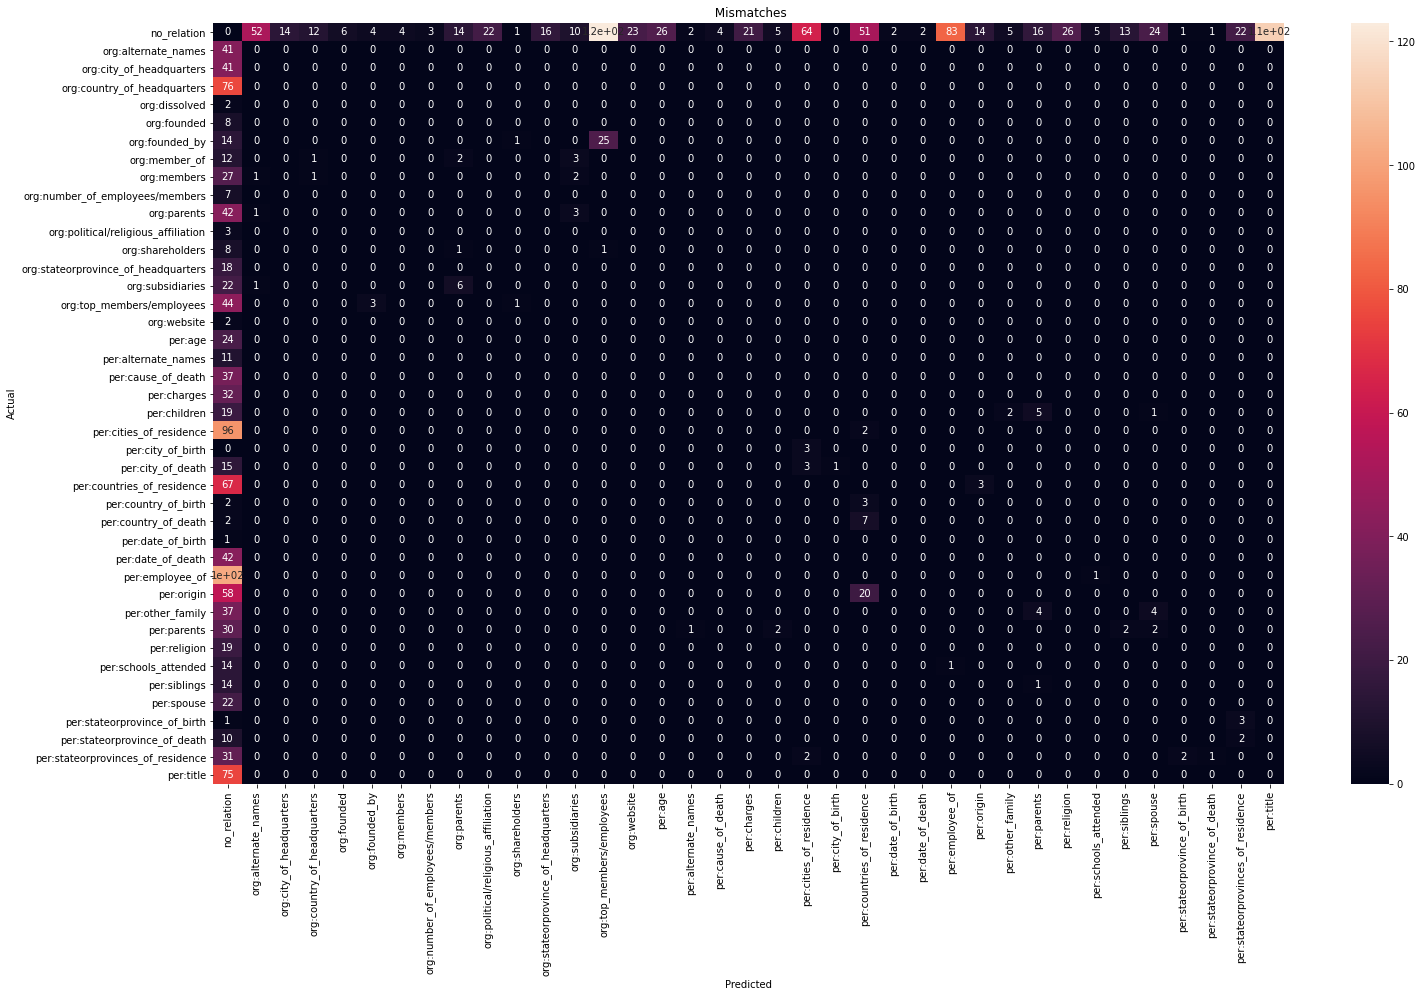

In [11]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.DataFrame(mismatches, columns = ['labels', 'predicted'])
plt.figure(figsize=(24,14))
plt.title(" Mismatches")
confusion_matrix = pd.crosstab(df['labels'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

plt.show()


## Big one  - Person to Employee relation is not getting identified 
## Secoond one - Not able to identify Organization to Alternative names relationship 
## Person to Origin and Person to countries of residence is getting confused


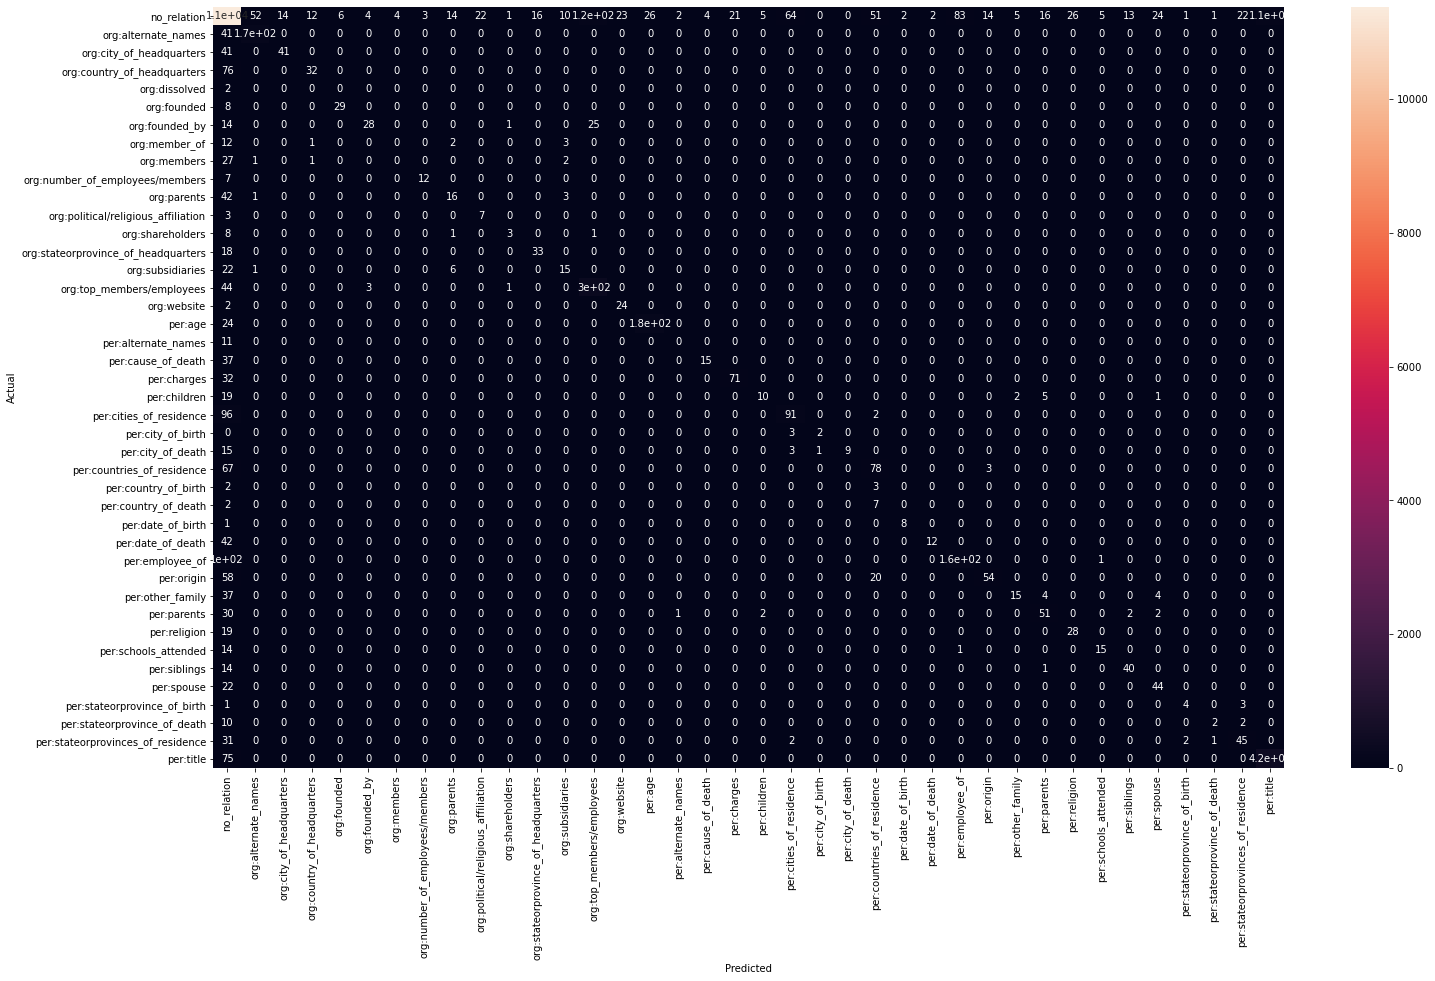

In [12]:
df_all = pd.DataFrame(all_rels, columns = ['labels', 'predicted'])
plt.figure(figsize=(24,14))
confusion_matrix = pd.crosstab(df_all['labels'], df_all['predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

plt.show()
